In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

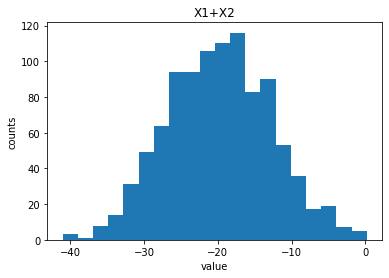

mean: -19.747648226006536
std: 7.012182217390008
Variance: 49.17069944988065


In [12]:
## PROBLEM 1
x1 = np.random.normal(-10, 5, 1000)
x2 = np.random.normal(-10, 5, 1000)
plt.hist(x1+x2, bins=20)
plt.title("X1+X2")
plt.xlabel("value")
plt.ylabel("counts")
plt.show()
print(f"mean: {(x1+x2).mean()}")
print(f"std: {(x1+x2).std()}")
print(f"Variance: {(x1+x2).std()**2}")

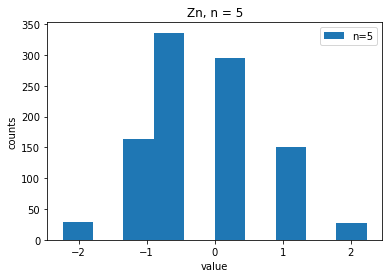

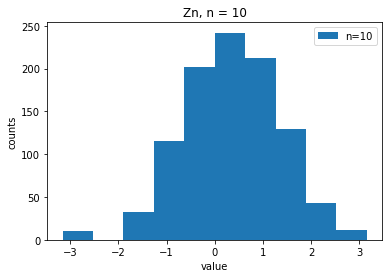

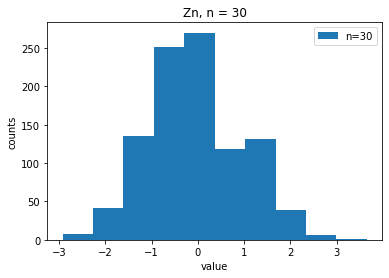

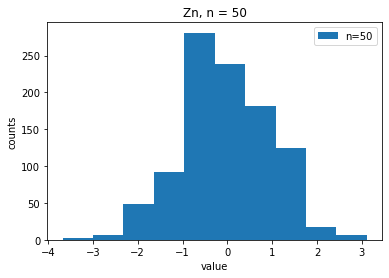

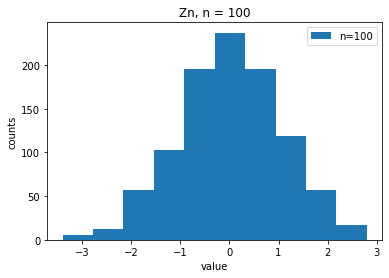

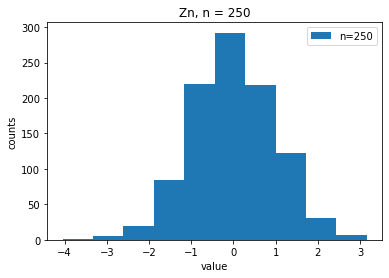

In [43]:
# PROBLEM2
bernoulli = lambda: 1 if np.random.random() >= 0.5 else -1
Zn = lambda n: sum([bernoulli() for _ in range(n)])/(n**(1/2))
def sampleZn(n, num=1000):
    return [Zn(n) for _ in range(num)]

ns = (5, 10, 30, 50, 100, 250)
for n in ns:
    plt.hist(sampleZn(n), label=f"n={n}")
    plt.title(f"Zn, n = {n}")
    plt.xlabel("value")
    plt.ylabel("counts")
    plt.legend()
    plt.show()




In [52]:
# PROBLEM 3
x = np.random.normal(0, 5, 25000)
# mean calculation
m = x.sum() / x.size
# variance calculation
sig_sq = ((x-m)**2).sum()/(x.size-1) 
print(f"mean estimate: {m}")
print(f"variance estimate: {sig_sq}")

mean estimate: 0.02378828031466119
variance estimate: 25.0299897669452


In [54]:
# PROBLEM 4
x = np.random.multivariate_normal((-5,5), ((20, .8),(.8, 30)), 10000)
x

array([[-4.87665688, 11.52558959],
       [-1.53752515, -8.06768075],
       [ 1.05895699,  1.93499836],
       ...,
       [-6.34397123, -1.79777162],
       [ 0.52073099, 11.24630893],
       [-5.43796817,  4.95168046]])